In [1]:
import librosa
import librosa.display


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models
    from tensorflow.keras.utils import to_categorical
    print("TensorFlow version:", tf.__version__)
except ImportError:
    print("TensorFlow kurulu değil. Derin öğrenme kısmı için sonra kurulacak.")
    print("Kurulum için: !pip install tensorflow")

print("Kütüphaneler başarıyla yüklendi!")

TensorFlow kurulu değil. Derin öğrenme kısmı için sonra kurulacak.
Kurulum için: !pip install tensorflow
Kütüphaneler başarıyla yüklendi!


In [5]:
data_path = r"C:\Users\slbdm\221229046_Selbihan_Demir\classification-of-heart-sound-recordings-the-physionet-computing-in-cardiology-challenge-2016-1.0.0"


In [7]:
import os
print("\n=== VERİ SETİ YAPISI ===")
for root, dirs, files in os.walk(data_path):
    level = root.replace(data_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... ve {len(files)-5} dosya daha')
    if level > 2: 
        break


=== VERİ SETİ YAPISI ===
classification-of-heart-sound-recordings-the-physionet-computing-in-cardiology-challenge-2016-1.0.0/
  figure1.png
  mathworks.png
  sample2016.zip
  sample2016b.zip
  training.zip
  ... ve 1 dosya daha
  papers/
    challenge2016.pdf
    goda.pdf
    grzegorczyk.pdf
    homsi.pdf
    index.html
    ... ve 9 dosya daha
  sources/
    2016-scoreinfo-with-authors
    496101031-214.zip
    adriana.costa.leal-205.zip
    andreas.dominik-207.tar.gz
    b.whitaker-224.zip
    ... ve 43 dosya daha
  training-a/
    .MD5SUMS-
    .newsums
    .oldsums
    .SHA1SUMS-
    .SHA256SUMS-
    ... ve 1231 dosya daha
  training-b/
    .MD5SUMS-
    .newsums
    .oldsums
    .SHA1SUMS-
    .SHA256SUMS-
    ... ve 988 dosya daha
  training-c/
    c0001.hea
    c0001.wav
    c0002.hea
    c0002.wav
    c0003.hea
    ... ve 65 dosya daha
  training-d/
    d0001.hea
    d0001.wav
    d0002.hea
    d0002.wav
    d0003.hea
    ... ve 113 dosya daha
  training-e/
    .MD5SUMS-
    .n

In [10]:
import os
import pandas as pd

def read_header_file(file_path):
    
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith('#'):
                    parts = line.strip().split()
                    if len(parts) >= 2:
                        label = parts[1]
                        return label
    except Exception as e:
        print(f"Hata: {file_path} - {e}")
        return None
    return None

def load_dataset(base_path, folders=['training-a', 'training-b', 'training-c', 
                                     'training-d', 'training-e', 'training-f']):
   
    data_list = []
    
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        if not os.path.exists(folder_path):
            print(f"Klasör bulunamadı: {folder}")
            continue
            
        print(f"\n{folder} klasörü işleniyor...")
        

        wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
        
        for wav_file in wav_files:
            wav_path = os.path.join(folder_path, wav_file)
            hea_file = wav_file.replace('.wav', '.hea')
            hea_path = os.path.join(folder_path, hea_file)
            
  
            if os.path.exists(hea_path):
                label = read_header_file(hea_path)
                if label is not None:
                    data_list.append({
                        'file_path': wav_path,
                        'file_name': wav_file,
                        'folder': folder,
                        'label': label
                    })
        
        print(f"  → {len(wav_files)} dosya bulundu")
    
    return pd.DataFrame(data_list)


print("=== VERİ SETİ YÜKLENİYOR ===")
df = load_dataset(data_path)

print(f"\nToplam {len(df)} kayıt yüklendi")
print("\n=== ETİKET DAĞILIMI ===")
print(df['label'].value_counts())
print("\n=== KLASÖR DAĞILIMI ===")
print(df['folder'].value_counts())


print("\n=== İLK 5 KAYIT ===")
print(df.head())



df['label_numeric'] = df['label'].apply(lambda x: 0 if x == 'Normal' else 1)


df_clean = df.copy()
print(f"\n=== TEMİZLENMİŞ VERİ ===")
print(f"Toplam kullanılabilir kayıt: {len(df_clean)}")
print("\nSınıf dağılımı:")
print(df_clean['label_numeric'].value_counts())
print("  0: Normal kalp sesi")
print("  1: Anormal kalp sesi")


normal_count = (df_clean['label_numeric'] == 0).sum()
abnormal_count = (df_clean['label_numeric'] == 1).sum()
print(f"\nNormal: {normal_count} (%{normal_count/len(df_clean)*100:.1f})")
print(f"Anormal: {abnormal_count} (%{abnormal_count/len(df_clean)*100:.1f})")

=== VERİ SETİ YÜKLENİYOR ===

training-a klasörü işleniyor...
  → 409 dosya bulundu

training-b klasörü işleniyor...
  → 490 dosya bulundu

training-c klasörü işleniyor...
  → 31 dosya bulundu

training-d klasörü işleniyor...
  → 55 dosya bulundu

training-e klasörü işleniyor...
  → 2141 dosya bulundu

training-f klasörü işleniyor...
  → 114 dosya bulundu

Toplam 3240 kayıt yüklendi

=== ETİKET DAĞILIMI ===
label
Normal      2575
Abnormal     665
Name: count, dtype: int64

=== KLASÖR DAĞILIMI ===
folder
training-e    2141
training-b     490
training-a     409
training-f     114
training-d      55
training-c      31
Name: count, dtype: int64

=== İLK 5 KAYIT ===
                                           file_path  file_name      folder  \
0  C:\Users\slbdm\221229046_Selbihan_Demir\classi...  a0001.wav  training-a   
1  C:\Users\slbdm\221229046_Selbihan_Demir\classi...  a0002.wav  training-a   
2  C:\Users\slbdm\221229046_Selbihan_Demir\classi...  a0003.wav  training-a   
3  C:\Users\sl

=== NORMAL KALP SESİ ===
Dosya: a0007.wav


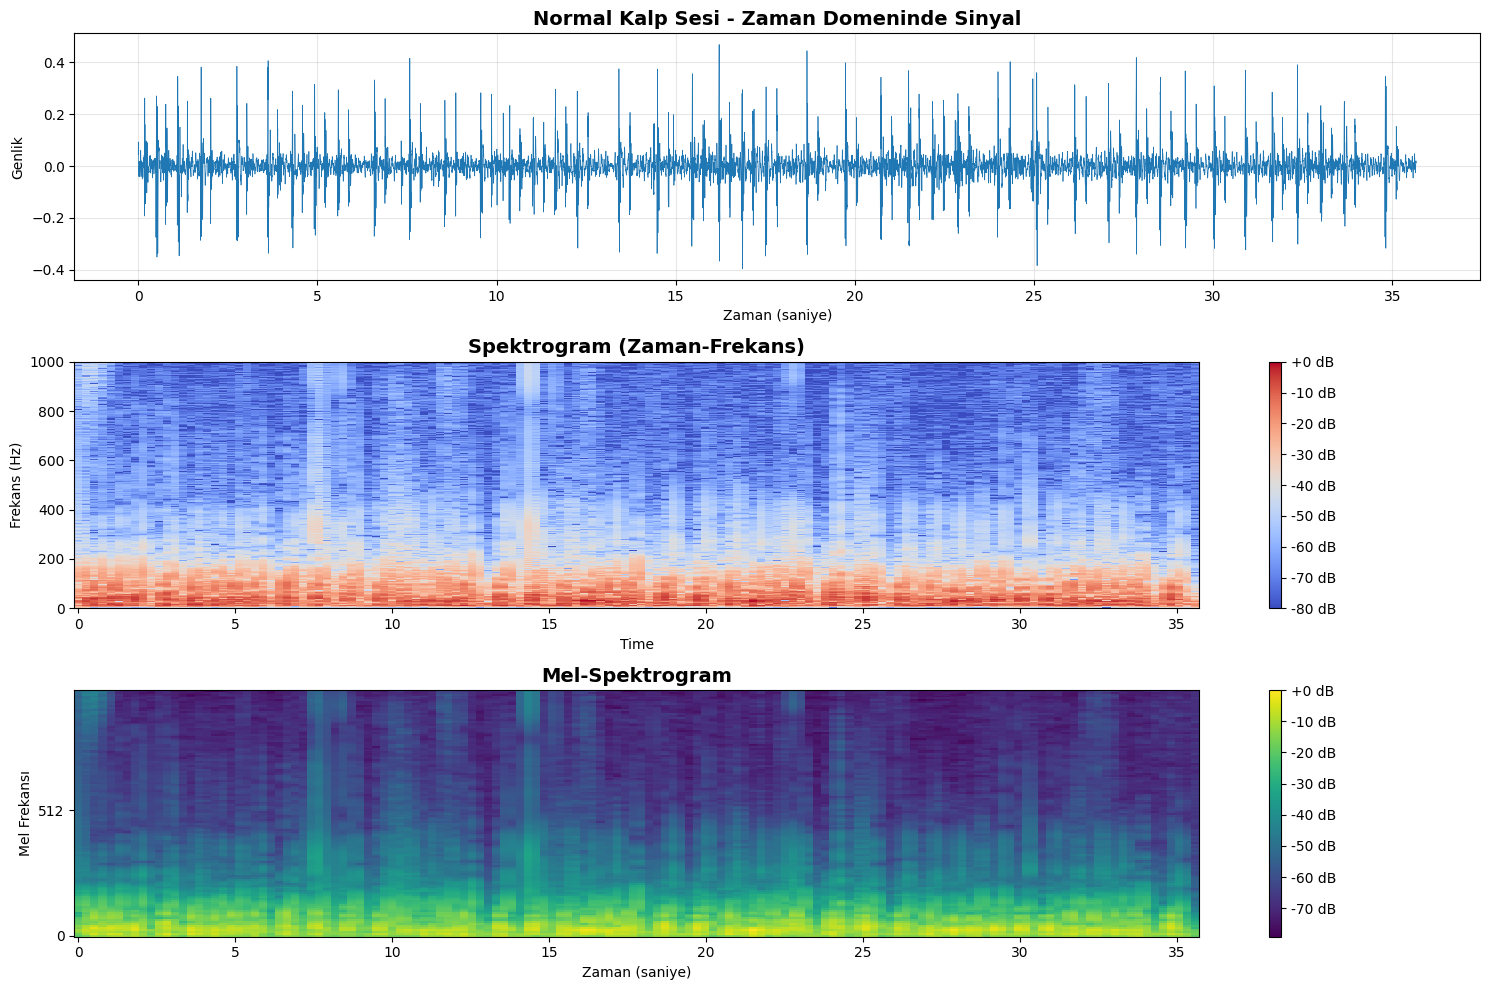

Ses süresi: 35.67 saniye
Örnekleme frekansı: 2000 Hz
Toplam örnek sayısı: 71332
Maksimum genlik: 0.4680
Ortalama genlik: 0.0349


=== ANORMAL KALP SESİ ===
Dosya: a0001.wav


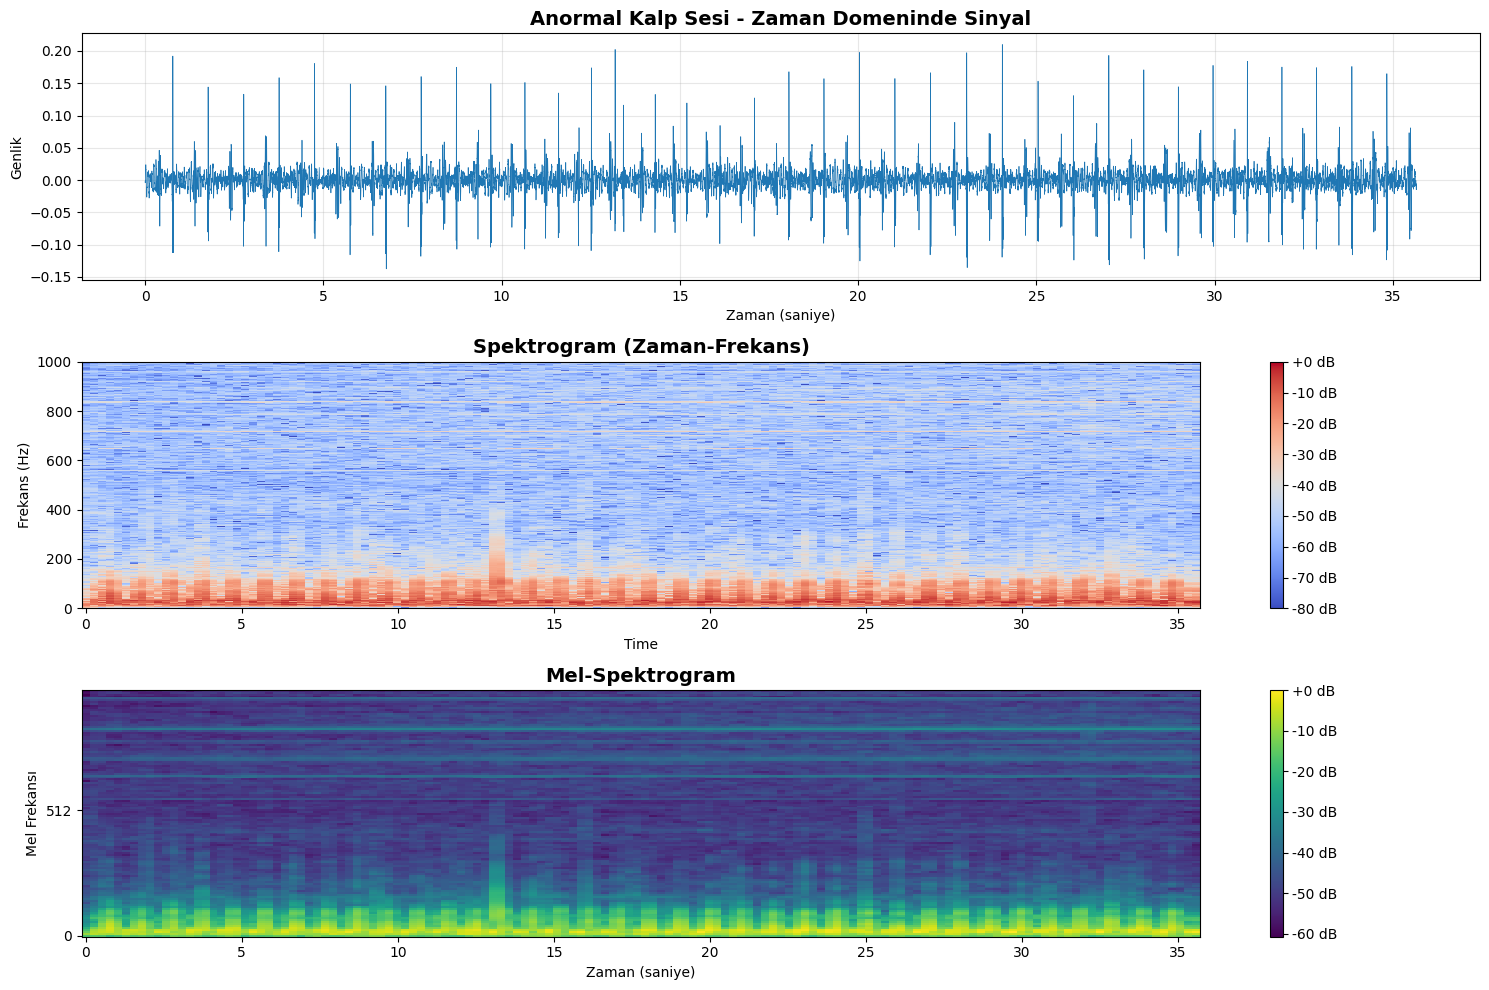

Ses süresi: 35.67 saniye
Örnekleme frekansı: 2000 Hz
Toplam örnek sayısı: 71332
Maksimum genlik: 0.2100
Ortalama genlik: 0.0132


In [12]:


import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


if 'df_clean' not in globals():
    print("Veri seti yükleniyor...")
    data_path = r"C:\Users\slbdm\221229046_Selbihan_Demir\classification-of-heart-sound-recordings-the-physionet-computing-in-cardiology-challenge-2016-1.0.0"
    
    try:
        df_clean = df.copy()
    except:
        print("Lütfen önce Adım 2'yi çalıştırın!")
        raise

def load_audio(file_path, sr=2000):
   
    audio, sample_rate = librosa.load(file_path, sr=sr)
    return audio, sample_rate

def visualize_audio(audio, sr, title="Kalp Sesi"):

    fig, axes = plt.subplots(3, 1, figsize=(15, 10))
    
    
    time = np.arange(0, len(audio)) / sr
    axes[0].plot(time, audio, linewidth=0.5)
    axes[0].set_title(f'{title} - Zaman Domeninde Sinyal', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Zaman (saniye)')
    axes[0].set_ylabel('Genlik')
    axes[0].grid(True, alpha=0.3)
    
    
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', ax=axes[1], cmap='coolwarm')
    axes[1].set_title('Spektrogram (Zaman-Frekans)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Frekans (Hz)')
    fig.colorbar(img, ax=axes[1], format='%+2.0f dB')
    

    mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
    img2 = librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[2], cmap='viridis')
    axes[2].set_title('Mel-Spektrogram', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Mel Frekansı')
    axes[2].set_xlabel('Zaman (saniye)')
    fig.colorbar(img2, ax=axes[2], format='%+2.0f dB')
    
    plt.tight_layout()
    plt.show()
    
    # Ses bilgilerini yazdır
    print(f"Ses süresi: {len(audio)/sr:.2f} saniye")
    print(f"Örnekleme frekansı: {sr} Hz")
    print(f"Toplam örnek sayısı: {len(audio)}")
    print(f"Maksimum genlik: {np.max(np.abs(audio)):.4f}")
    print(f"Ortalama genlik: {np.mean(np.abs(audio)):.4f}")

print("=== NORMAL KALP SESİ ===")
normal_example = df_clean[df_clean['label_numeric'] == 0].iloc[0]
print(f"Dosya: {normal_example['file_name']}")
audio_normal, sr_normal = load_audio(normal_example['file_path'])
visualize_audio(audio_normal, sr_normal, title="Normal Kalp Sesi")

print("\n" + "="*80 + "\n")


print("=== ANORMAL KALP SESİ ===")
abnormal_example = df_clean[df_clean['label_numeric'] == 1].iloc[0]
print(f"Dosya: {abnormal_example['file_name']}")
audio_abnormal, sr_abnormal = load_audio(abnormal_example['file_path'])
visualize_audio(audio_abnormal, sr_abnormal, title="Anormal Kalp Sesi")

In [16]:


import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from tqdm import tqdm

def extract_features_fast(audio, sr):
  
    features = {}
    
  
    features['rms_mean'] = np.sqrt(np.mean(audio**2))
    features['zcr_mean'] = np.mean(librosa.feature.zero_crossing_rate(audio)[0])
    features['signal_mean'] = np.mean(audio)
    features['signal_std'] = np.std(audio)
    features['signal_max'] = np.max(np.abs(audio))
    features['signal_skewness'] = skew(audio)
    features['signal_kurtosis'] = kurtosis(audio)
    
    

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    for i in range(13):
        features[f'mfcc_{i}_mean'] = np.mean(mfcc[i])
        features[f'mfcc_{i}_std'] = np.std(mfcc[i])
    

    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    features['spectral_centroid_mean'] = np.mean(spectral_centroid)
    
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    features['spectral_rolloff_mean'] = np.mean(spectral_rolloff)
    
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
    features['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
    

    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40)
    mel_spec_db = librosa.power_to_db(mel_spec)
    features['mel_mean'] = np.mean(mel_spec_db)
    features['mel_std'] = np.std(mel_spec_db)
    
    return features

print("=== VERİ SETİNİ DENGELİ ÖRNEKLİYORUZ ===")


n_samples_per_class = 500  

normal_samples = df_clean[df_clean['label_numeric'] == 0].sample(n=n_samples_per_class, random_state=42)
abnormal_samples = df_clean[df_clean['label_numeric'] == 1].sample(n=min(n_samples_per_class, len(df_clean[df_clean['label_numeric'] == 1])), random_state=42)

df_sampled = pd.concat([normal_samples, abnormal_samples]).reset_index(drop=True)

print(f"Orijinal veri: {len(df_clean)} dosya")
print(f"Örneklenmiş veri: {len(df_sampled)} dosya")
print(f"  - Normal: {len(normal_samples)}")
print(f"  - Anormal: {len(abnormal_samples)}")




feature_list = []
failed_files = []

for idx in tqdm(range(len(df_sampled)), desc="Özellik çıkarımı"):
    row = df_sampled.iloc[idx]
    try:
      
        audio, sr = librosa.load(row['file_path'], sr=2000, duration=10)  # İlk 10 saniye
        
  
        features = extract_features_fast(audio, sr)
        features['label'] = row['label_numeric']
        features['file_name'] = row['file_name']
        
        feature_list.append(features)
        
    except Exception as e:
        failed_files.append((row['file_name'], str(e)))
        continue


features_df = pd.DataFrame(feature_list)

print("\n=== ÖZELLİK ÇIKARIMI TAMAMLANDI ===")
print(f"Başarılı: {len(features_df)} dosya")
print(f"Başarısız: {len(failed_files)} dosya")
print(f"\nÇıkarılan özellik sayısı: {len(features_df.columns) - 2}")


print("\n=== SINIF DAĞILIMI ===")
print(features_df['label'].value_counts())


print("\n=== ÖZELLİKLER (İlk 5 satır) ===")
print(features_df.head())


feature_names = [col for col in features_df.columns if col not in ['label', 'file_name']]
print(f"\n=== TOPLAM {len(feature_names)} ÖZELLİK ===")
for i, name in enumerate(feature_names, 1):
    print(f"{i:2d}. {name}")


features_df.to_csv('heart_sound_features.csv', index=False)
print("\n✓ Özellikler 'heart_sound_features.csv' dosyasına kaydedildi!")

=== VERİ SETİNİ DENGELİ ÖRNEKLİYORUZ ===
Orijinal veri: 3240 dosya
Örneklenmiş veri: 1000 dosya
  - Normal: 500
  - Anormal: 500

=== HIZLI ÖZELLİK ÇIKARIMI BAŞLIYOR ===
Yaklaşık süre: 2-3 dakika



Özellik çıkarımı: 100%|████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 62.76it/s]


=== ÖZELLİK ÇIKARIMI TAMAMLANDI ===
Başarılı: 1000 dosya
Başarısız: 0 dosya

Çıkarılan özellik sayısı: 38

=== SINIF DAĞILIMI ===
label
0    500
1    500
Name: count, dtype: int64

=== ÖZELLİKLER (İlk 5 satır) ===
   rms_mean  zcr_mean  signal_mean  signal_std  signal_max  signal_skewness  \
0  0.162700  0.011121    -0.115606    0.114485    0.908447         0.939623   
1  0.114125  0.198328    -0.015958    0.113004    0.859650        -1.196654   
2  0.161766  0.018555    -0.056862    0.151443    1.000000        -0.487553   
3  0.113244  0.028918    -0.054104    0.099483    0.915649        -0.929914   
4  0.060658  0.206409    -0.008467    0.060064    0.725861        -1.436555   

   signal_kurtosis  mfcc_0_mean  mfcc_0_std  mfcc_1_mean  ...  mfcc_11_std  \
0        19.095493  -110.101318    7.846178    86.333221  ...     2.671454   
1        13.299334   -58.420433   11.618342    57.321362  ...     3.490435   
2         2.801607  -263.543701   67.517952   146.966217  ...     4.663746  

=== VERİ SETİ BİLGİLERİ ===
Özellik sayısı: 38
Örnek sayısı: 1000
Sınıf dağılımı: Normal=500, Anormal=500

Eğitim seti: 800 örnek
Test seti: 200 örnek

✓ Özellikler standartlaştırıldı!

MODEL 1: RANDOM FOREST

--- Random Forest Sonuçları ---
Accuracy:  0.8950
Precision: 0.9072
Recall:    0.8800
F1-Score:  0.8934

Classification Report:
              precision    recall  f1-score   support

      Normal       0.88      0.91      0.90       100
     Anormal       0.91      0.88      0.89       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200


MODEL 2: SUPPORT VECTOR MACHINE (SVM)

--- SVM Sonuçları ---
Accuracy:  0.8700
Precision: 0.8854
Recall:    0.8500
F1-Score:  0.8673

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.89      0.87       100
     Anormal       0.89      0.85      0.87       100

    accuracy 

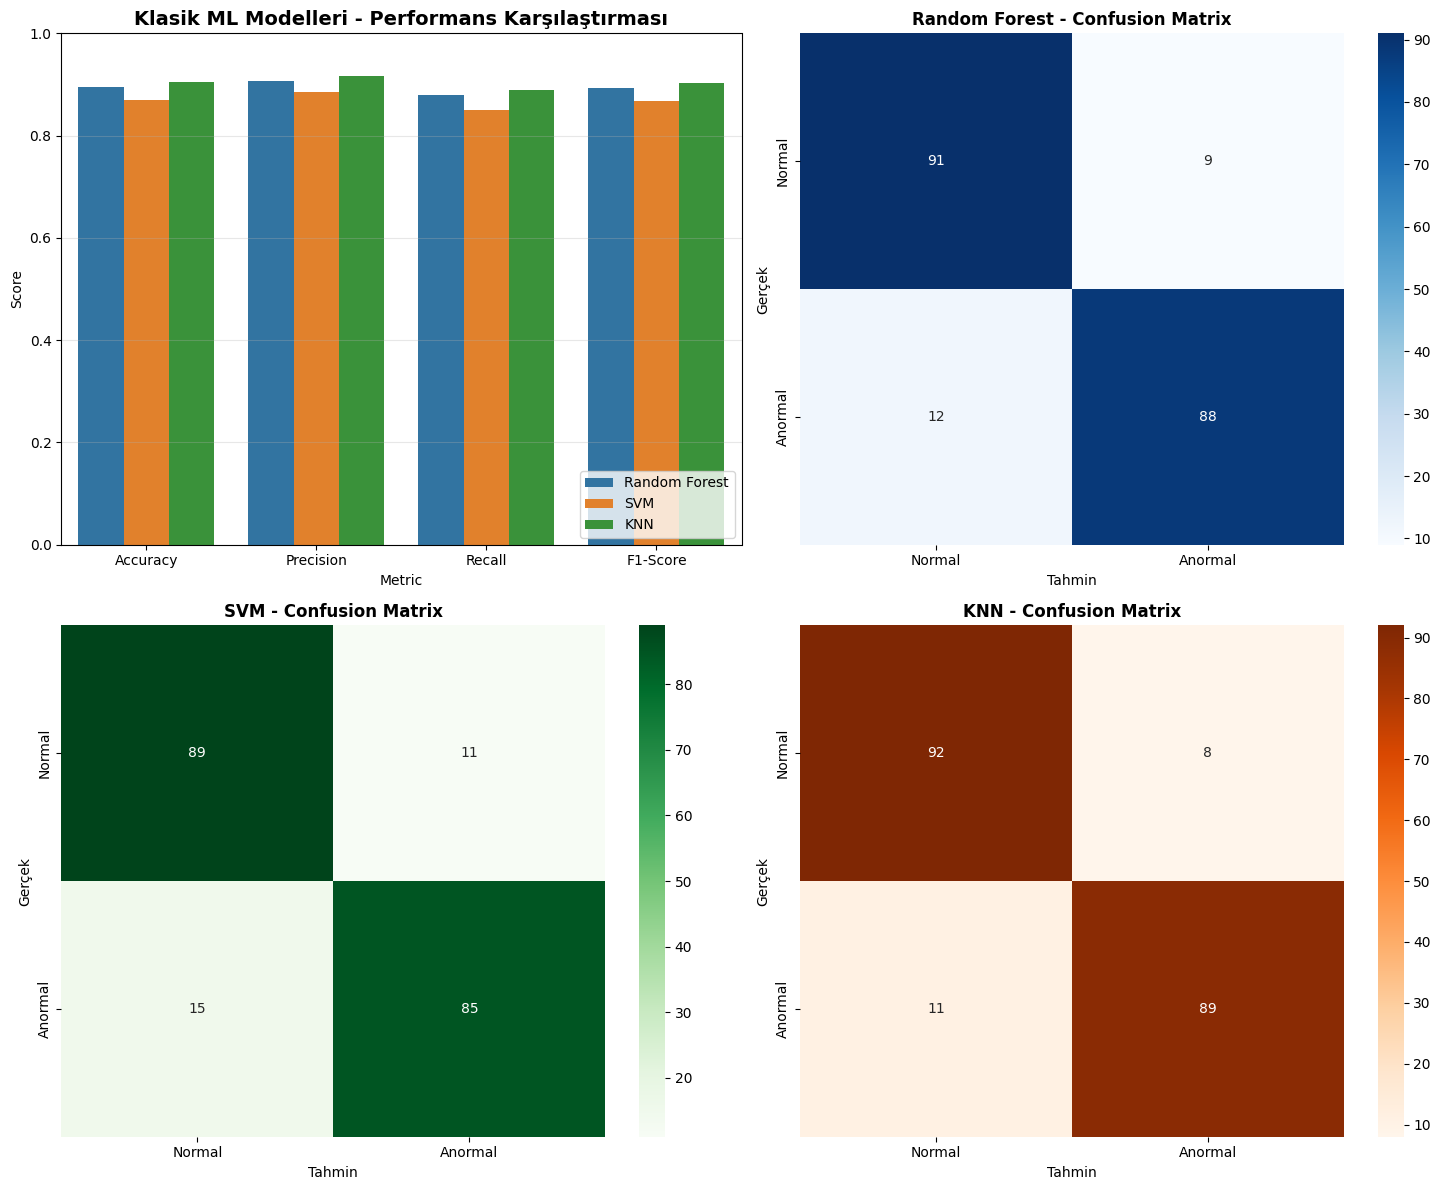


✓ Grafik 'classical_ml_results.png' olarak kaydedildi!

🏆 EN İYİ MODEL: KNN (F1-Score: 0.9036)

=== EN ÖNEMLİ 10 ÖZELLİK (Random Forest) ===
    Feature  Importance
mfcc_7_mean    0.117345
signal_mean    0.068392
 mfcc_0_std    0.065429
mfcc_9_mean    0.054109
 mfcc_2_std    0.045900
mfcc_8_mean    0.039418
 mfcc_9_std    0.038811
mfcc_5_mean    0.038546
mfcc_6_mean    0.035826
   rms_mean    0.032254


In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, f1_score)


feature_columns = [col for col in features_df.columns if col not in ['label', 'file_name']]
X = features_df[feature_columns].values
y = features_df['label'].values

print("=== VERİ SETİ BİLGİLERİ ===")
print(f"Özellik sayısı: {X.shape[1]}")
print(f"Örnek sayısı: {X.shape[0]}")
print(f"Sınıf dağılımı: Normal={np.sum(y==0)}, Anormal={np.sum(y==1)}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nEğitim seti: {X_train.shape[0]} örnek")
print(f"Test seti: {X_test.shape[0]} örnek")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Özellikler standartlaştırıldı!")


print("\n" + "="*60)
print("MODEL 1: RANDOM FOREST")
print("="*60)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


print("\n--- Random Forest Sonuçları ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Normal', 'Anormal']))


print("\n" + "="*60)
print("MODEL 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*60)

svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


print("\n--- SVM Sonuçları ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_svm):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Normal', 'Anormal']))


print("\n" + "="*60)
print("MODEL 3: K-NEAREST NEIGHBORS (KNN)")
print("="*60)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)


print("\n--- KNN Sonuçları ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_knn):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Normal', 'Anormal']))


print("\n" + "="*60)
print("MODEL KARŞILAŞTIRMASI")
print("="*60)


results_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn)
    ]
})

print("\n", results_df.to_string(index=False))


fig, axes = plt.subplots(2, 2, figsize=(15, 12))


ax1 = axes[0, 0]
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model', ax=ax1)
ax1.set_title('Klasik ML Modelleri - Performans Karşılaştırması', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)


cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], 
            xticklabels=['Normal', 'Anormal'], yticklabels=['Normal', 'Anormal'])
axes[0, 1].set_title('Random Forest - Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Gerçek')
axes[0, 1].set_xlabel('Tahmin')


cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0],
            xticklabels=['Normal', 'Anormal'], yticklabels=['Normal', 'Anormal'])
axes[1, 0].set_title('SVM - Confusion Matrix', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Gerçek')
axes[1, 0].set_xlabel('Tahmin')


cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1],
            xticklabels=['Normal', 'Anormal'], yticklabels=['Normal', 'Anormal'])
axes[1, 1].set_title('KNN - Confusion Matrix', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Gerçek')
axes[1, 1].set_xlabel('Tahmin')

plt.tight_layout()
plt.savefig('classical_ml_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Grafik 'classical_ml_results.png' olarak kaydedildi!")


best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_f1 = results_df.loc[best_model_idx, 'F1-Score']

print(f"\n EN İYİ MODEL: {best_model_name} (F1-Score: {best_f1:.4f})")


print("\n=== EN ÖNEMLİ 10 ÖZELLİK (Random Forest) ===")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

In [18]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


TensorFlow version: 2.20.0

=== VERİ ŞEKİLLERİ ===
X_train_cnn shape: (800, 38, 1)
X_test_cnn shape: (200, 38, 1)
y_train_cat shape: (800, 2)

=== CNN MODELİ OLUŞTURULUYOR ===

Model Mimarisi:


C:\Users\slbdm\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 36, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 36, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 16, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 6, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,106 (652.76 KB)

 Trainable params: 165,954 (648.26 KB)

 Non-trainable params: 1,152 (4.50 KB)


=== MODEL EĞİTİMİ BAŞLIYOR ===
Epoch sayısı: 100 (early stopping ile)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6594 - loss: 0.9182 - precision: 0.6594 - recall: 0.6594 - val_accuracy: 0.7437 - val_loss: 0.6630 - val_precision: 0.7437 - val_recall: 0.7437 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7031 - loss: 0.8010 - precision: 0.7031 - recall: 0.7031 - val_accuracy: 0.5188 - val_loss: 0.6774 - val_precision: 0.5188 - val_recall: 0.5188 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7000 - loss: 0.7770 - precision: 0.7000 - recall: 0.7000 - val_accuracy: 0.5188 - val_loss: 0.6725 - val_precision: 0.5188 - val_recall: 0.5188 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7109 - loss: 0.6659 - precision: 0.7109 - recall: 0.7109 - val_accuracy: 0.5188 - val_loss: 0.6791 - val_precision: 0.5188 - val_recall: 0.5188 - learning_rate: 0.

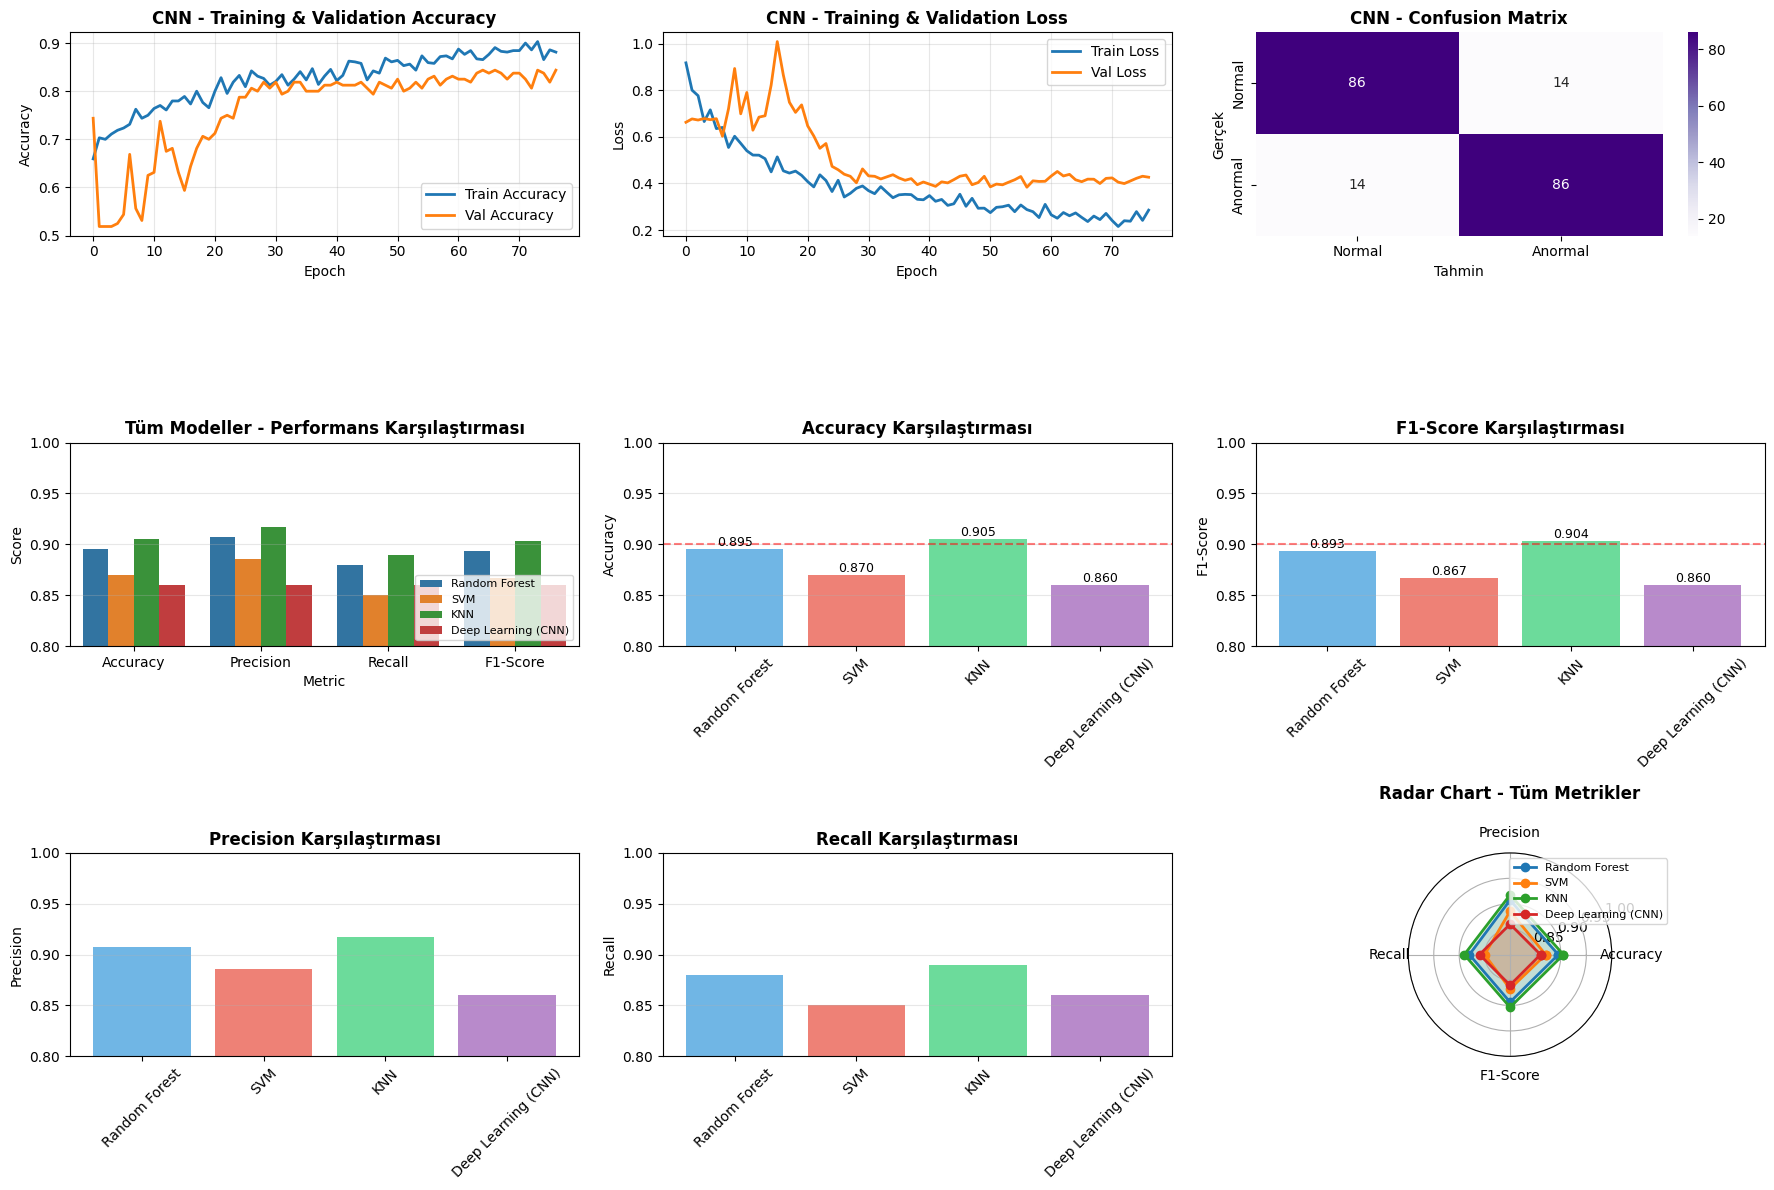


✓ Grafik 'cnn_complete_results.png' olarak kaydedildi!

🏆 FİNAL SONUÇLARI

EN İYİ MODEL: KNN
  • Accuracy:  0.9050 (90.50%)
  • Precision: 0.9175
  • Recall:    0.8900
  • F1-Score:  0.9036

📊 Klasik ML vs Derin Öğrenme:
  • En iyi Klasik ML: 0.9036
  • CNN: 0.8600
  ✅ Klasik ML 0.0436 puan daha iyi!

✓ Tüm analizler tamamlandı!
✓ Modeller başarıyla eğitildi ve karşılaştırıldı!


In [19]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, f1_score)

print("TensorFlow version:", tf.__version__)
print()


X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

y_train_cat = keras.utils.to_categorical(y_train, 2)
y_test_cat = keras.utils.to_categorical(y_test, 2)

print("=== VERİ ŞEKİLLERİ ===")
print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")
print(f"y_train_cat shape: {y_train_cat.shape}")
print()


print("=== CNN MODELİ OLUŞTURULUYOR ===")

model_cnn = models.Sequential([

    layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                  input_shape=(X_train_cnn.shape[1], 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),

    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),
    
   
    layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.4),
    

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    
  
    layers.Dense(2, activation='softmax')
])

print("\nModel Mimarisi:")
model_cnn.summary()


model_cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)


print("\n=== MODEL EĞİTİMİ BAŞLIYOR ===")
print("Epoch sayısı: 100 (early stopping ile)")
print()

history = model_cnn.fit(
    X_train_cnn, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


print("\n=== CNN MODEL SONUÇLARI ===")

# Test seti üzerinde tahmin
y_pred_cnn_probs = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)

# Performans metrikleri
print(f"\nAccuracy:  {accuracy_score(y_test, y_pred_cnn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cnn):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_cnn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_cnn):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=['Normal', 'Anormal']))


cm_cnn = confusion_matrix(y_test, y_pred_cnn)

print("\n" + "="*60)
print("KLASİK ML vs DERİN ÖĞRENME (CNN) KARŞILAŞTIRMASI")
print("="*60)

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'KNN', 'Deep Learning (CNN)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_cnn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_cnn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_cnn)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_cnn)
    ]
})

print("\n", comparison_df.to_string(index=False))


fig = plt.figure(figsize=(18, 12))


ax1 = plt.subplot(3, 3, 1)
ax1.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
ax1.set_title('CNN - Training & Validation Accuracy', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(alpha=0.3)


ax2 = plt.subplot(3, 3, 2)
ax2.plot(history.history['loss'], label='Train Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
ax2.set_title('CNN - Training & Validation Loss', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(alpha=0.3)


ax3 = plt.subplot(3, 3, 3)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Purples', ax=ax3,
            xticklabels=['Normal', 'Anormal'], yticklabels=['Normal', 'Anormal'])
ax3.set_title('CNN - Confusion Matrix', fontweight='bold')
ax3.set_ylabel('Gerçek')
ax3.set_xlabel('Tahmin')


ax4 = plt.subplot(3, 3, 4)
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='Model', ax=ax4)
ax4.set_title('Tüm Modeller - Performans Karşılaştırması', fontweight='bold')
ax4.set_ylim([0.8, 1.0])
ax4.legend(loc='lower right', fontsize=8)
ax4.grid(axis='y', alpha=0.3)


ax5 = plt.subplot(3, 3, 5)
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
bars = ax5.bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors, alpha=0.7)
ax5.set_title('Accuracy Karşılaştırması', fontweight='bold')
ax5.set_ylabel('Accuracy')
ax5.set_ylim([0.8, 1.0])
ax5.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='%90 eşiği')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)


ax6 = plt.subplot(3, 3, 6)
bars2 = ax6.bar(comparison_df['Model'], comparison_df['F1-Score'], color=colors, alpha=0.7)
ax6.set_title('F1-Score Karşılaştırması', fontweight='bold')
ax6.set_ylabel('F1-Score')
ax6.set_ylim([0.8, 1.0])
ax6.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='%90 eşiği')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)


ax7 = plt.subplot(3, 3, 7)
ax7.bar(comparison_df['Model'], comparison_df['Precision'], color=colors, alpha=0.7)
ax7.set_title('Precision Karşılaştırması', fontweight='bold')
ax7.set_ylabel('Precision')
ax7.set_ylim([0.8, 1.0])
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)


ax8 = plt.subplot(3, 3, 8)
ax8.bar(comparison_df['Model'], comparison_df['Recall'], color=colors, alpha=0.7)
ax8.set_title('Recall Karşılaştırması', fontweight='bold')
ax8.set_ylabel('Recall')
ax8.set_ylim([0.8, 1.0])
ax8.tick_params(axis='x', rotation=45)
ax8.grid(axis='y', alpha=0.3)


ax9 = plt.subplot(3, 3, 9, projection='polar')
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for idx, row in comparison_df.iterrows():
    values = row[['Accuracy', 'Precision', 'Recall', 'F1-Score']].values.tolist()
    values += values[:1]
    ax9.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax9.fill(angles, values, alpha=0.15)

ax9.set_xticks(angles[:-1])
ax9.set_xticklabels(categories)
ax9.set_ylim(0.8, 1.0)
ax9.set_title('Radar Chart - Tüm Metrikler', fontweight='bold', pad=20)
ax9.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=8)
ax9.grid(True)

plt.tight_layout()
plt.savefig('cnn_complete_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Grafik 'cnn_complete_results.png' olarak kaydedildi!")


best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']
best_acc = comparison_df.loc[best_model_idx, 'Accuracy']

print("\n" + "="*60)
print("🏆 FİNAL SONUÇLARI")
print("="*60)
print(f"\nEN İYİ MODEL: {best_model_name}")
print(f"  • Accuracy:  {best_acc:.4f} ({best_acc*100:.2f}%)")
print(f"  • Precision: {comparison_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"  • Recall:    {comparison_df.loc[best_model_idx, 'Recall']:.4f}")
print(f"  • F1-Score:  {best_f1:.4f}")

print("\n📊 Klasik ML vs Derin Öğrenme:")
classical_best = comparison_df[comparison_df['Model'] != 'Deep Learning (CNN)']['F1-Score'].max()
dl_score = comparison_df[comparison_df['Model'] == 'Deep Learning (CNN)']['F1-Score'].values[0]
print(f"  • En iyi Klasik ML: {classical_best:.4f}")
print(f"  • CNN: {dl_score:.4f}")
if dl_score > classical_best:
    print(f"  ✅ CNN {(dl_score-classical_best):.4f} puan daha iyi!")
else:
    print(f"  ✅ Klasik ML {(classical_best-dl_score):.4f} puan daha iyi!")

print("\n Tüm analizler tamamlandı!")
print(" Modeller başarıyla eğitildi ve karşılaştırıldı!")